In [6]:
from embeddings import get_embeddings
import os
import numpy as np
import json
import matplotlib.pyplot as plt

os.getcwd()

'/Users/nizarmichaud/PycharmProjects/DeID/pre_processing'

In [12]:
base_dir = '../example_identifiers'
out_dir = '../example_identifiers_embeddings'
languages = os.listdir(base_dir)
type_ids = ['location', 'name', 'other', 'time']
type_files = ['words.json', 'context_ex.json']

data_dict = {}

for language in languages:

    data_dict[language] = {}

    for type_id in type_ids:

        data_dict[language][type_id] = {}

        for type_file in type_files:

            with open(os.path.join(base_dir, language, type_id, type_file), 'r') as f:
                data = json.loads(f.read())

            embeddings = get_embeddings(data)

            embeddings = np.array(embeddings)

            np.save(os.path.join(out_dir, f'{language}_{type_id}_{type_file.split(".")[0]}.npy'), embeddings)
            print(f'Saved: {language} – {type_id} – {type_file}')


Saved: english – location – words.json
Saved: english – location – context_ex.json
Saved: english – name – words.json
Saved: english – name – context_ex.json
Saved: english – other – words.json
Saved: english – other – context_ex.json
Saved: english – time – words.json
Saved: english – time – context_ex.json


In [34]:
from umap import UMAP

all_embeddings = []
all_labels = []
for i in os.listdir(out_dir):
    all_embeddings.append(np.load(os.path.join(out_dir, i)))
    all_labels += [i for _ in range(all_embeddings[-1].shape[0])]

all_embeddings = np.vstack(all_embeddings)

reducer = UMAP(n_jobs=-1)

reduced = reducer.fit_transform(all_embeddings)


/Users/nizarmichaud/PycharmProjects/DeID/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


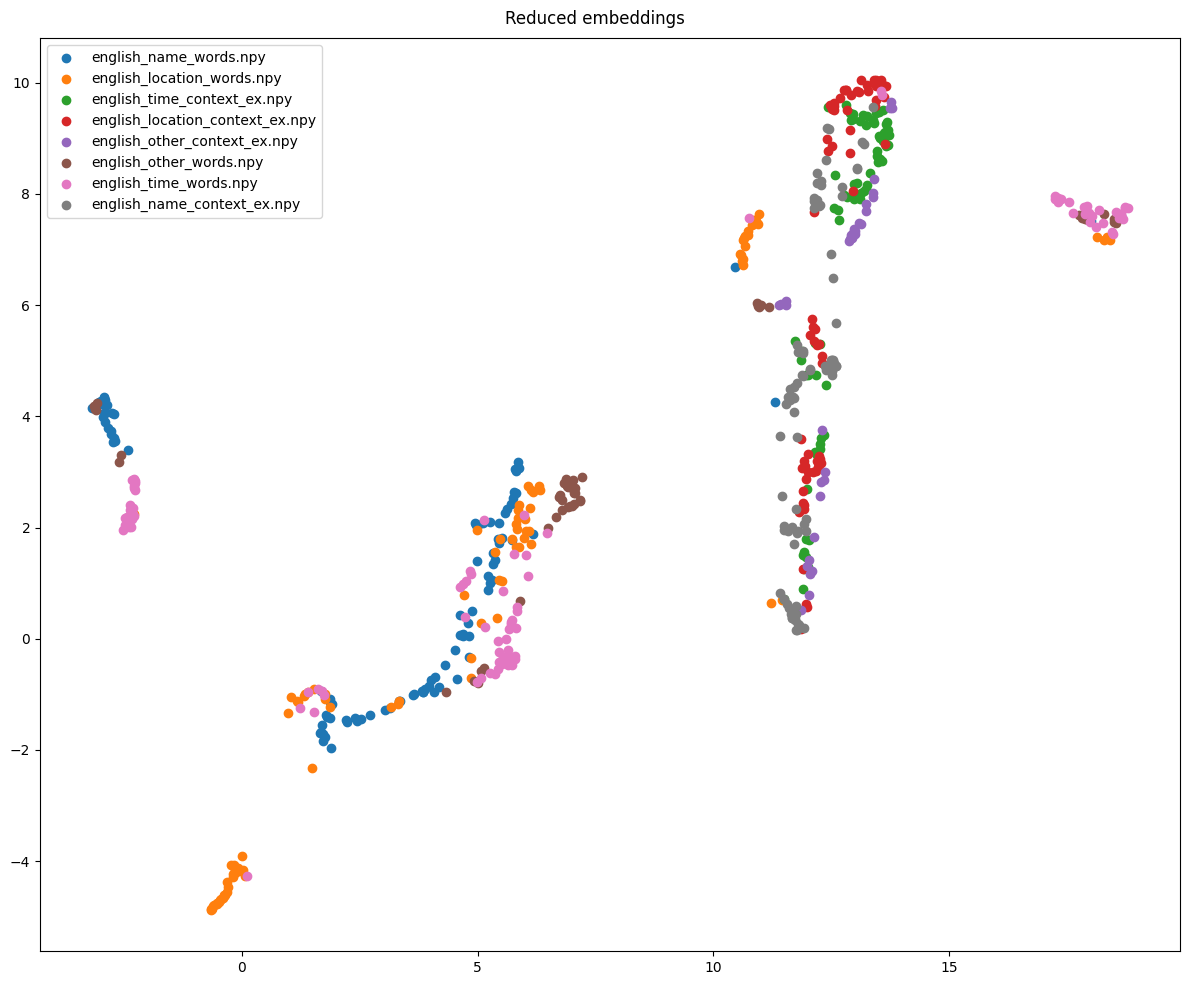

In [36]:
from matplotlib import colormaps

fig, ax = plt.subplots(figsize=(12, 10))

colors = colormaps['tab20c']

for i, label in enumerate(list(set(all_labels))):
    idx = [True if l == label else False for l in all_labels]

    embeddings_plot = reduced[idx]

    ax.scatter(embeddings_plot[:, 0], embeddings_plot[:, 1], label=label)

ax.legend()
fig.suptitle('Reduced embeddings')
fig.tight_layout()
plt.show()
